## Exploratory Data Analysis

After cleaning the dataset, and fixing the datatypes in the previous step, the dataset is now ready to be analyzed and explored. Analying and understand our data helps in yielding better predictory results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('alg_ff_clean.csv')

---



### Statistical Summary

In [3]:
df.drop(columns={'Classes','day','year','month'}).describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,encode
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035389,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425242,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### Checking the Feature Distribution

Skewness can greatly impact the model's predictive ability by squishing less frequent values. 

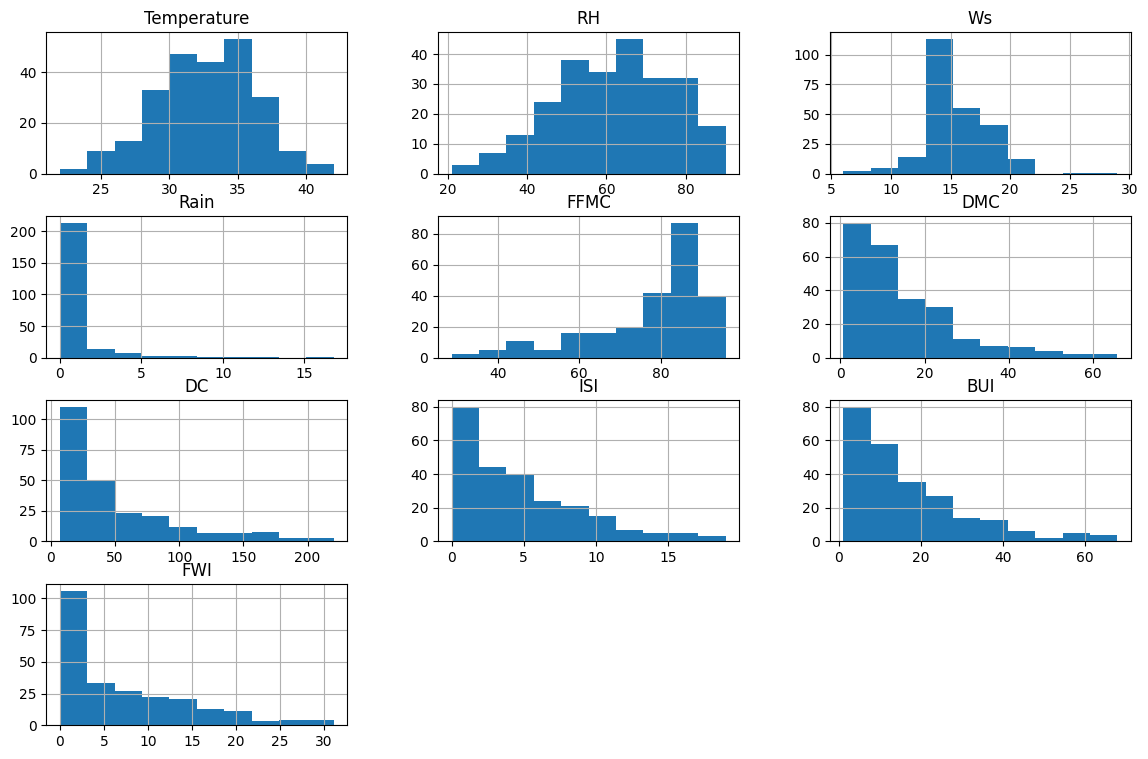

In [4]:
df.drop(columns={'day','month','year','encode'}).hist(figsize=(14,9))
plt.show()


The skewness in this dataset is a direct reflection of the physical reality of fire weather: extreme conditions are rarer but are exactly what cause fire events.
However target skewness can be observed, this could cause more frequent values to squish less frequent ones causing inaccurate results especially for the least frequent FWI values.
- #### Boxplot for Viewing Outliers Distribution

<Axes: >

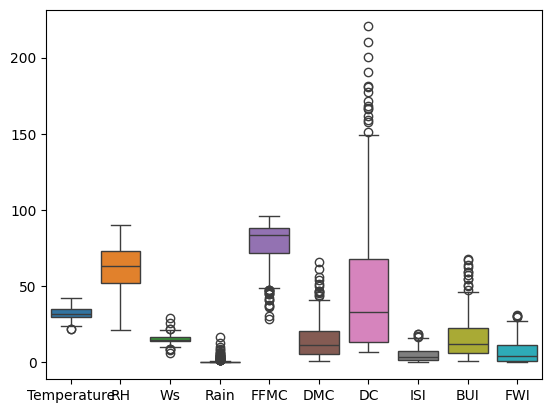

In [5]:
sns.boxplot(df.drop(columns={'day','month','year','encode','Classes'}))

Boxplot exhibits a heavy outlier presence, influenced by the skewness.
- Most of the outliers that occur in Canadian Forest Fire Weather Index Components reflect extreme weather conditions 

Log scaling the target to create a more balanced distribution

In [6]:

df['FWI-log']= np.log1p(df['FWI'])

Checking the new distributions 

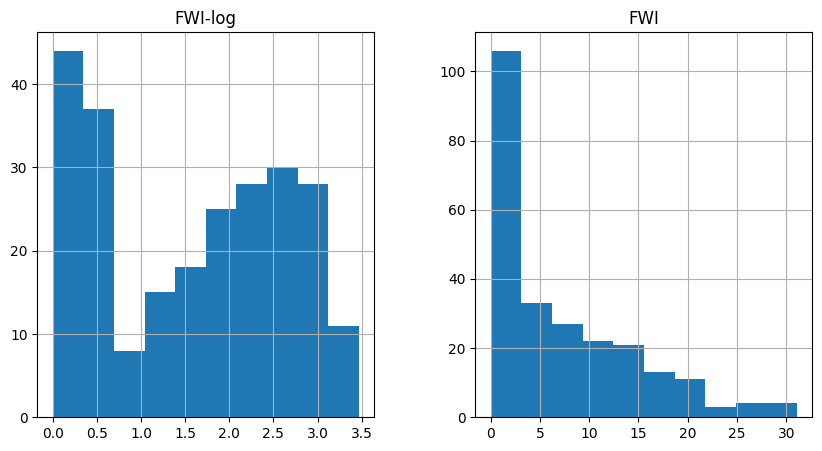

In [7]:
df[['FWI-log','FWI']].hist(figsize=(10,5))
plt.show()

We can notice much better distributions.

---

### Data Multicollinearity

<Axes: >

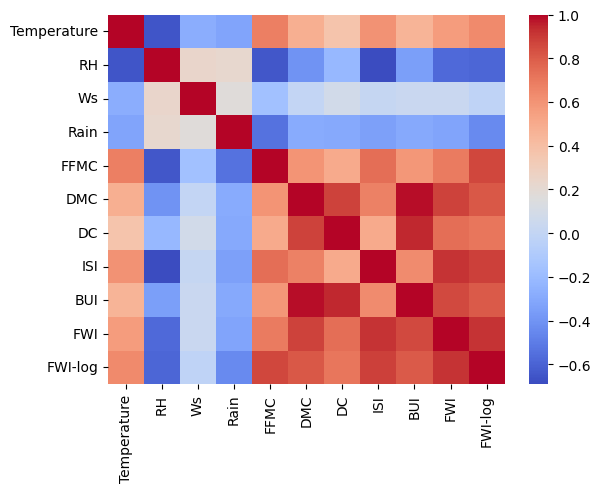

In [8]:
sns.heatmap(df.drop(columns={'day','month','year','encode','Classes'}).corr(), cmap = "coolwarm")

This data obviously has multicollinearity between it's features, especially between ['FWI' , 'BUI' , 'ISI' , 'DC' , 'DMC' , 'FFMC']
- Regularization models are a good idea

---

### Extracting Feature Insights

In this section, we explore how different features relate to fire occurrence.
- Weather Indices
- Canadian Forest Fire Weather Indices

 #### Weather Indices

Text(0.5, 1.0, 'Fire Count per Temperature')

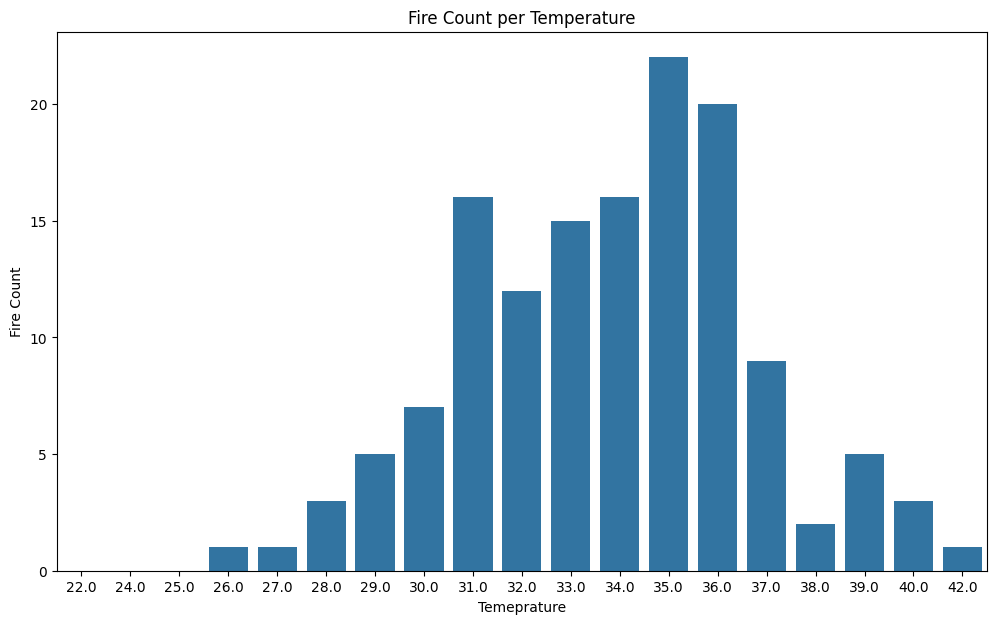

In [9]:
plt.figure(figsize=(12,7))
sns.barplot(data = df.groupby('Temperature')['encode'].sum().reset_index(), x = 'Temperature', y = 'encode')
plt.xlabel("Temeprature")
plt.ylabel("Fire Count")
plt.title("Fire Count per Temperature")

Text(0.5, 1.0, 'Fire Count per Month')

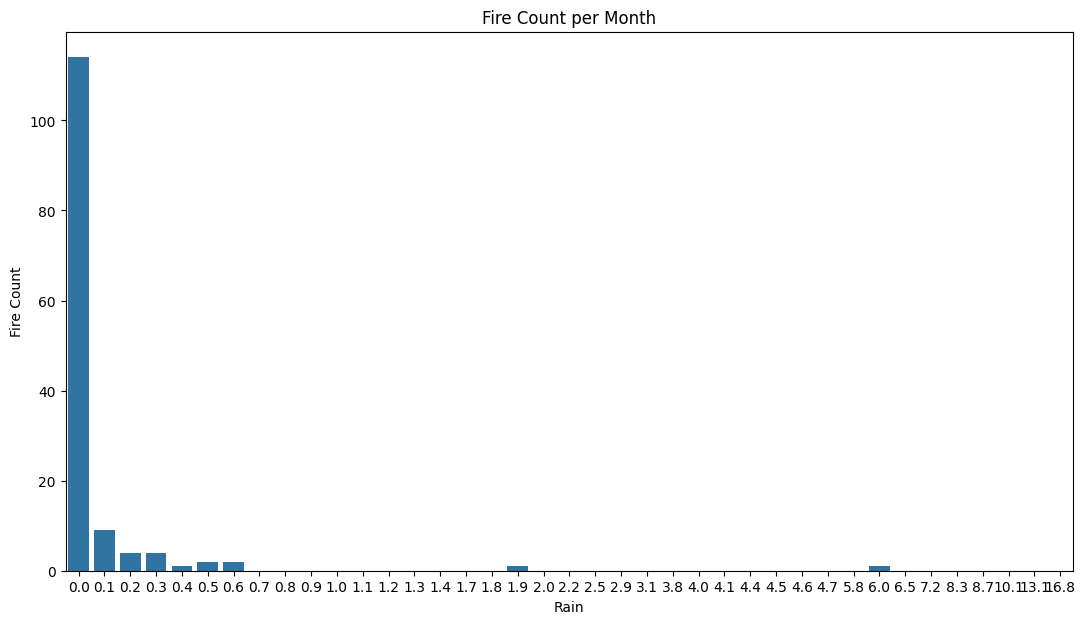

In [10]:
plt.figure(figsize=(13,7))
sns.barplot(data = df.groupby('Rain')['encode'].sum().reset_index(), x = 'Rain', y = 'encode')
plt.xlabel("Rain")
plt.ylabel("Fire Count")
plt.title("Fire Count per Month")

---

#### Canadian Forest Fire Weather Index

<Axes: xlabel='DC', ylabel='Count'>

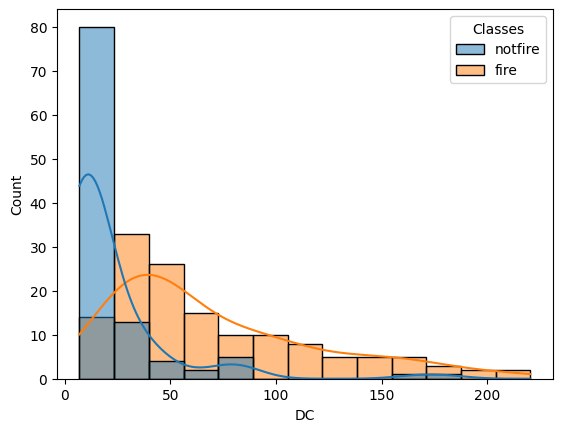

In [ ]:
sns.histplot(kde=True, data=df, x = 'DC', hue = 'Classes')

<Axes: xlabel='DMC', ylabel='Count'>

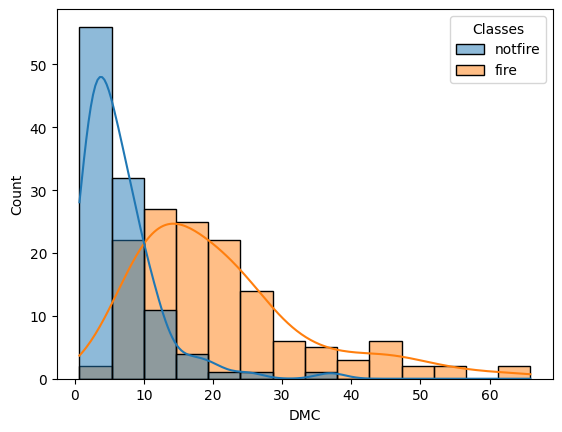

In [ ]:
sns.histplot(kde=True, data=df, x = 'DMC', hue = 'Classes')

<Axes: xlabel='BUI', ylabel='Count'>

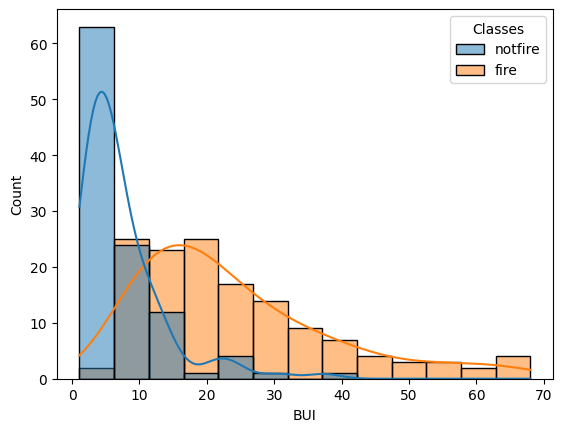

In [ ]:
sns.histplot(kde=True, data=df, x = 'BUI', hue = 'Classes')

<Axes: xlabel='FWI', ylabel='Count'>

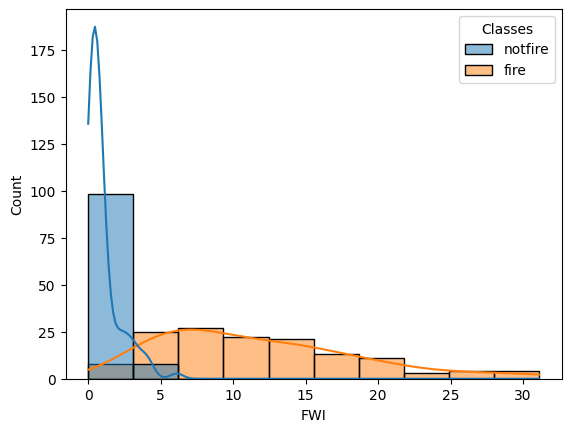

In [ ]:
sns.histplot(kde=True, data=df, x = 'FWI', hue = 'Classes')

<Axes: xlabel='FFMC', ylabel='Count'>

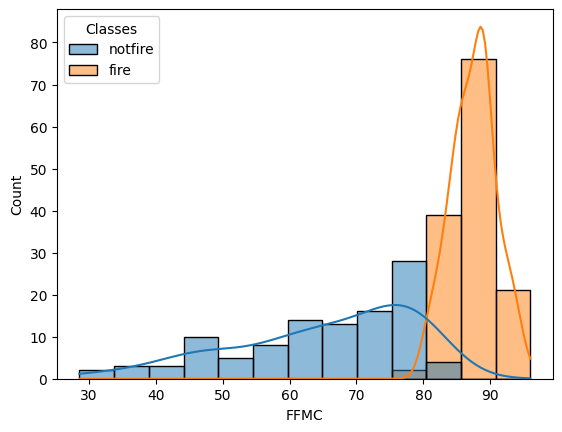

In [ ]:
sns.histplot(kde=True, data=df, x = 'FFMC', hue = 'Classes')

---

### Months with the Most Fires


Text(0.5, 1.0, 'Fire Count per Month')

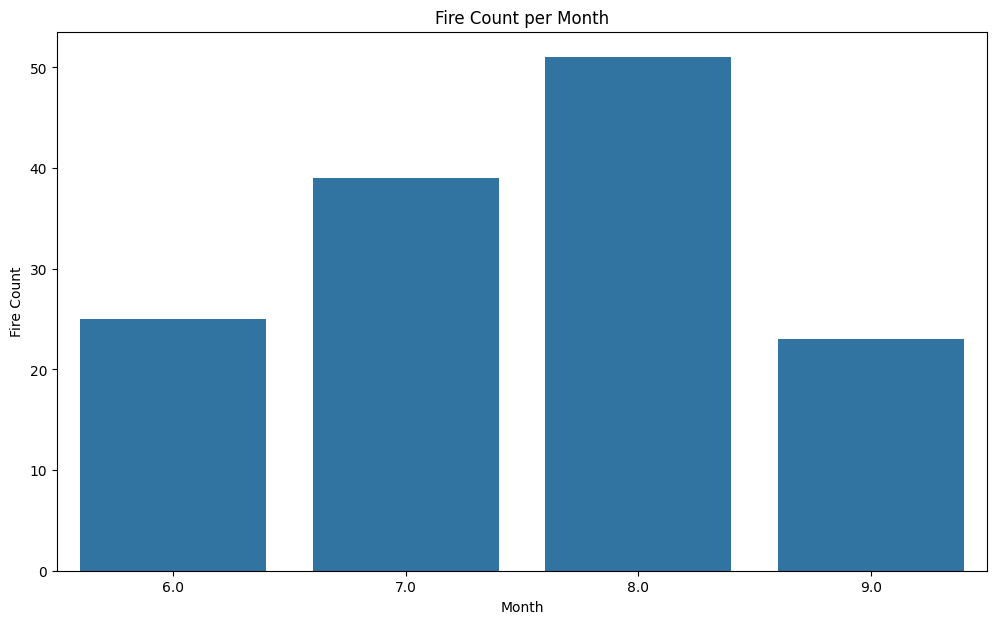

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(data = df.groupby('month')['encode'].sum().reset_index(), x = 'month', y = 'encode')
plt.xlabel("Month")
plt.ylabel("Fire Count")
plt.title("Fire Count per Month")

---


